# PCA analysis of VAE latent space

In [1]:
import os
import numpy as np
from specvae.model import BaseModel
import specvae.dataset as dt
import specvae.utils as utils

In [2]:
# Parameters
dataset = "MoNA"
model_name = "betavae_capacity_20-1600-3-1600-20_03 (24-12-2021_00-17-31)"
model_dir = "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\betavae_capacity_20-1600-3-1600-20_03 (24-12-2021_00-17-31)"


In [3]:
# Parameters
model_dirs = [
    # HMDB
    ## BetaVAE
    ### Best:
    # "d:\\Workspace\\SpecVAE\\.model\\HMDB\\betavae_capacity_nextron\\best\\betavae_capacity_20-400-200-50-2-50-200-400-20_01 (24-12-2021_19-40-39)",
    # "d:\\Workspace\\SpecVAE\\.model\\HMDB\\betavae_capacity_nextron\\best\\betavae_capacity_20-1600-2-1600-20_02 (24-12-2021_18-27-38)",
    # "d:\\Workspace\\SpecVAE\\.model\\HMDB\\betavae_capacity_nextron\\best\\betavae_capacity_20-100-2-90-100-20_03 (24-12-2021_20-30-13)",
    # "d:\\Workspace\\SpecVAE\\.model\\HMDB\\betavae_capacity_nextron\\best\\betavae_capacity_20-100-90-2-90-100-20_04 (24-12-2021_19-24-07)",
    # "d:\\Workspace\\SpecVAE\\.model\\HMDB\\betavae_capacity_nextron\\best\\betavae_capacity_20-400-100-2-100-400-20_05 (24-12-2021_19-09-29)",
    # "d:\\Workspace\\SpecVAE\\.model\\HMDB\\betavae_capacity_nextron\\best\\betavae_capacity_20-100-90-2-100-20_06 (24-12-2021_20-58-10)",
    ### Beta:
    # "d:\\Workspace\\SpecVAE\\.model\\HMDB\\betavae_capacity_nextron\\beta\\betavae_capacity_100-1600-200-50-2-50-200-1600-100_01 (25-12-2021_00-55-14)",
    # "d:\\Workspace\\SpecVAE\\.model\\HMDB\\betavae_capacity_nextron\\beta\\betavae_capacity_100-1600-200-50-2-50-200-1600-100_02 (25-12-2021_00-54-51)",
    # "d:\\Workspace\\SpecVAE\\.model\\HMDB\\betavae_capacity_nextron\\beta\\betavae_capacity_100-1600-200-50-2-50-200-1600-100_03 (25-12-2021_01-06-31)",
    # "d:\\Workspace\\SpecVAE\\.model\\HMDB\\betavae_capacity_nextron\\beta\\betavae_capacity_100-1600-200-50-2-50-200-1600-100_04 (25-12-2021_01-07-02)",
    # "d:\\Workspace\\SpecVAE\\.model\\HMDB\\betavae_capacity_nextron\\beta\\betavae_capacity_100-1600-200-50-2-50-200-1600-100_05 (25-12-2021_00-45-49)",
    # "d:\\Workspace\\SpecVAE\\.model\\HMDB\\betavae_capacity_nextron\\beta\\betavae_capacity_100-1600-200-50-2-50-200-1600-100_06 (25-12-2021_00-48-55)",
    ### BetaVAE and FactorVAE Score
    # "d:\\Workspace\\SpecVAE\\.model\\HMDB\\betavae_capacity_nextron\\betavae_score\\betavae_capacity_100-1600-2-1600-100_01 (24-12-2021_23-54-27)",
    # "d:\\Workspace\\SpecVAE\\.model\\HMDB\\betavae_capacity_nextron\\betavae_score\\betavae_capacity_100-1600-2-1600-100_02 (24-12-2021_23-54-12)",
    # "d:\\Workspace\\SpecVAE\\.model\\HMDB\\betavae_capacity_nextron\\betavae_score\\betavae_capacity_100-1600-2-1600-100_03 (25-12-2021_00-03-53)",
    # "d:\\Workspace\\SpecVAE\\.model\\HMDB\\betavae_capacity_nextron\\betavae_score\\betavae_capacity_100-800-100-2-800-100_04 (25-12-2021_02-25-04)",
    # "d:\\Workspace\\SpecVAE\\.model\\HMDB\\betavae_capacity_nextron\\betavae_score\\betavae_capacity_100-1600-2-100-1600-100_05 (25-12-2021_01-17-18)",
    # "d:\\Workspace\\SpecVAE\\.model\\HMDB\\betavae_capacity_nextron\\betavae_score\\betavae_capacity_100-200-100-2-200-100_06 (25-12-2021_02-14-20)",


    # MoNA
    ## BetaVAE
    ### Best
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\best\\betavae_capacity_20-800-200-50-3-50-200-800-20_01 (24-12-2021_01-50-12)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\best\\betavae_capacity_20-400-100-3-400-20_02 (24-12-2021_03-34-34)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\best\\betavae_capacity_20-1600-3-1600-20_03 (24-12-2021_00-17-31)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\best\\betavae_capacity_20-800-3-800-20_04 (24-12-2021_00-25-10)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\best\\betavae_capacity_20-100-3-90-100-20_05 (24-12-2021_03-01-19)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\best\\betavae_capacity_50-400-3-100-400-50_06 (24-12-2021_06-19-49)"
    ### Beta
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\beta\\betavae_capacity_100-1600-200-50-3-50-200-1600-100_01 (24-12-2021_09-13-36)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\beta\\betavae_capacity_100-1600-200-50-3-50-200-1600-100_02 (24-12-2021_09-15-11)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\beta\\betavae_capacity_100-1600-200-50-3-50-200-1600-100_03 (24-12-2021_09-29-26)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\beta\\betavae_capacity_100-1600-200-50-3-50-200-1600-100_04 (24-12-2021_09-29-36)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\beta\\betavae_capacity_100-1600-200-50-3-50-200-1600-100_05 (24-12-2021_09-06-14)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\beta\\betavae_capacity_100-1600-200-50-3-50-200-1600-100_06 (24-12-2021_09-05-10)",
    ### BetaVAE Score
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\betavae_score\\betavae_capacity_100-400-100-3-400-100_01 (24-12-2021_11-06-17)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\betavae_score\\betavae_capacity_100-800-100-3-800-100_02 (24-12-2021_10-59-29)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\betavae_score\\betavae_capacity_100-400-200-50-3-50-200-400-100_03 (24-12-2021_09-47-19)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\betavae_score\\betavae_capacity_100-1600-3-1600-100_04 (24-12-2021_08-02-44)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\betavae_score\\betavae_capacity_100-400-100-3-400-100_05 (24-12-2021_10-57-01)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\betavae_score\\betavae_capacity_100-400-100-3-100-400-100_06 (24-12-2021_08-41-33)",

    "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\betavae_score\\betavae_capacity_100-400-200-50-3-50-200-400-100_03 (24-12-2021_09-47-19)",
    ### FactorVAE Score
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\factorvae_score\\betavae_capacity_100-100-90-50-3-50-90-100-100_01 (24-12-2021_09-48-37)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\factorvae_score\\betavae_capacity_100-1600-100-3-1600-100_02 (24-12-2021_10-51-41)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\factorvae_score\\betavae_capacity_100-800-100-3-800-100_03 (24-12-2021_11-16-41)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\factorvae_score\\betavae_capacity_100-1600-3-1600-100_04 (24-12-2021_08-02-44)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\factorvae_score\\betavae_capacity_100-400-200-50-3-50-200-400-100_05 (24-12-2021_09-23-23)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\factorvae_score\\betavae_capacity_100-1600-100-3-100-1600-100_06 (24-12-2021_08-25-38)",

    ## JointVAE
    ### Best:
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\jointvae_capacity_nextron\\jointvae_capacity_100-200-3-200-100_05 (25-12-2021_21-42-54)",

]

## Load model

In [4]:
device, cpu = utils.device(use_cuda=False)

Device in use:  cpu


In [5]:
def load_model(path):
    model_path = os.path.join(path, 'model.pth')
    model = BaseModel.load(model_path, device)
    model.eval()
    return model

## Load and transform data

In [6]:
if dataset == 'MoNA':
    labels = ['ionization_mode_id', 'collision_energy', 'total_exact_mass', 'precursor_mz', 'instrument_id', 'instrument_type_id', 'precursor_type_id', 'superclass_id', 'class_id']
    base_path = utils.get_project_path() / '.data' / 'MoNA'
    metadata_path = base_path / 'MoNA_meta.npy'
elif dataset == 'HMDB':
    labels = ['ionization_mode_id', 'collision_energy', 'superclass_id', 'class_id']
    base_path = utils.get_project_path() / '.data' / 'HMDB'
    metadata_path = base_path / 'HMDB_meta.npy'

metadata = None
if os.path.exists(metadata_path):
    metadata = np.load(metadata_path, allow_pickle=True).item()

df_all = dt.Spectra.open(base_path / ('%s_full.csv' % dataset))

In [7]:
def load_vis_data(target_column):
    data_path = base_path / ('visualization_%s.csv' % target_column)
    df = dt.Spectra.open(data_path)
    return df

In [8]:
def preload_data_as_tensor(model, df, n=-1):
    columns = model.config['input_columns']
    types = model.config['types']
    data = dt.Spectra.preload_tensor(
        device=device, data_frame=df[columns + ['id']], transform=model.transform, limit=n, types=types, do_print=False)
    return data

In [9]:
from specvae.vae import SpecVEA
from specvae.jointvae import JointVAE

def evaluate_model(model, df, data):
    print("Encode N=%d instances from %s dataset..." % (data['id'].shape[0], dataset))
    X, ids = data['spectrum'], data['id'] # TODO: handle the case for concatanated input
    Xrecon, z, latent_dist = model.forward_(X)
    print(z.shape)
    data_np = {}
    data_np['model_type'] = 'betavae' if isinstance(model, SpecVEA) else 'jointvae'
    data_np['X'] = X.data.cpu().numpy()
    data_np['Xrecon'] = Xrecon.data.cpu().numpy()
    data_np['z'] = z.data.cpu().numpy()
    data_np['ids'] = ids
    data_np['ionization_mode_id'] = df['ionization_mode_id'].to_numpy()
    data_np['collision_energy'] = df['collision_energy'].to_numpy()
    if dataset == 'MoNA':
        data_np['instrument_type_id'] = df['instrument_type_id'].to_numpy()
    # data_np['images'] = df['images'].to_numpy()
    return data_np


## Prepare data for vizualization

In [10]:
import torch
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(24,20)})

import torchvision as tv
import specvae.vae as vae, specvae.utils as utils
import plotly.io as pio
pio.renderers.default='notebook'
import plotly.express as px
import pandas as pd

In [11]:
def get_colors(df, data_np):
    colors = {}
    colors['ionization_mode_id'] = np.array(list(map(lambda x: 'negative' if x==0 else 'positive', data_np['ionization_mode_id'].tolist())))
    colors['collision_energy'] = data_np['collision_energy']
    colors['superclass_id'] = df['superclass'].to_numpy()
    df['class'] = df['class'].fillna('Undefined')
    colors['class_id'] = df['class'].to_numpy()
    if dataset == 'MoNA':
        df['precursor_type'] = df['precursor_type'].fillna('Undefined')
        colors['precursor_type_id'] = df['precursor_type'].to_numpy()
        df['instrument_type'] = df['instrument_type'].fillna('Undefined')
        colors['instrument_type_id'] = df['instrument_type'].to_numpy()
        df['instrument'] = df['instrument'].fillna('Undefined')
        colors['instrument_id'] = df['instrument'].to_numpy()
        colors['total_exact_mass'] = df['total_exact_mass'].to_numpy()
        colors['precursor_mz'] = df['precursor_mz'].to_numpy()
    return colors

In [12]:
def compute_pca(data, n=2):
    print("Compute PCA for n_components=%d" % n)
    red = PCA(n)
    rdata = red.fit_transform(data)
    print("\t      explained_variance:", red.explained_variance_)
    print("\texplained_variance_ratio:", red.explained_variance_ratio_)
    return rdata, red

def compute_tsne(data, n=2):
    print("Compute tSNE for n_components=%d" % n)
    r = TSNE(n)
    rdata = r.fit_transform(data)
    print("TSNE:")
    print("\t      kl_divergence:", r.kl_divergence_)
    return rdata

def compute_umap(data, n_neighbors=15, min_dist=0.25, n=2, metric='euclidean'):
    print("Compute UMAP for n_components=%d" % n)
    fit = UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n,
        metric=metric)
    udata = fit.fit_transform(data)
    return udata

def plot_data(data, labels=None, label_name=None, plot_components=2, 
        hover_data=None, width=1000, height=1000, title='Visualization of dataset'):
    if plot_components == 2:
        fig = px.scatter(data, x=0, y=1, color=labels, 
            template='plotly_white', hover_data=hover_data,
            title=title, width=width, height=height)
        fig.show()
    elif plot_components == 3:
        fig = px.scatter_3d(data, x=0, y=1, z=2, color=labels, 
            template='plotly_white', hover_data=hover_data, 
            title=title, width=width, height=height)
        fig.update_traces(
            marker=dict(size=3),
            selector=dict(mode='markers'))
        fig.show()

In [13]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import numpy as np

def plot_latent_discrete(x, y, labels, scale_size=1., cmap='BrBG_r', alpha=0.8, 
    figsize=(10, 10), dpi=100, xlabel='X', ylabel='Y', xlim=None, ylim=None):
    fig = plt.figure(figsize=figsize, dpi=dpi)
    gs = fig.add_gridspec(2, 2,  width_ratios=(2, 14), height_ratios=(14, 2),
        left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.05, hspace=0.05)
    ax_main = plt.subplot(gs[0, 1])
    ax_xDist = plt.subplot(gs[1, 1], sharex=ax_main)
    ax_yDist = plt.subplot(gs[0, 0], sharey=ax_main)
    # ax_cbar = plt.subplot(gs[0, 2])

    label_uq, inx_uq = np.unique(labels, return_inverse=True)
    cm = get_cmap(cmap)
    for i, label in enumerate(label_uq):
        color = cm(i)
        inx = np.where(labels == label)
        x_, y_ = x[inx], y[inx]
        sc = ax_main.scatter(x_, y_, s=scale_size, marker='.', color=color,
            alpha=alpha, edgecolors='black', linewidth=0.1, label=label)
        ax_main.xaxis.set_major_locator(plt.MaxNLocator(10))
        ax_main.yaxis.set_major_locator(plt.MaxNLocator(10))
        ax_main.set_xlim(xlim)
        ax_main.set_ylim(ylim)

        ax_xDist.hist(x=x_, bins=100, align='mid', density=True, lw=0.2, alpha=0.5, color=color)
        sns.kdeplot(x_, ax=ax_xDist, fill=True, color=color)
        ax_xDist.set(xlabel=xlabel, ylabel='')

        ax_yDist.hist(y_, bins=100, orientation='horizontal', 
            align='mid', density=True, lw=0.2, alpha=0.5, color=color)
        sns.kdeplot(y=y_, ax=ax_yDist, fill=True, color=color)
        ax_yDist.set(xlabel='', ylabel=ylabel)

    plt.setp(ax_main.get_xticklabels(), visible=False)
    plt.setp(ax_main.get_yticklabels(), visible=False)
    ax_main.legend(loc='upper right')
    return fig, ax_main

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as pch
import matplotlib.ticker as tck
from matplotlib.lines import Line2D
from itertools import cycle, product
import itertools as it
from functools import reduce
from matplotlib.cm import get_cmap

def dicrete_plot(X, ys, labels, true_labels=None, kind='hist', index_prefix='Var ',
        sunith=1.0, unith=1.0, unitv=0.5, scale=1.0, border=2.0, legend_offset=1.0, 
        enable_minor_grid=True, set_ylim=True, xlim=(-10, 10), ylim=(0, 1.5)):
    # Extract labels:
    cm = get_cmap('Dark2')
    luq = np.unique(labels)
    _labels = {i: list(range(1, y.shape[1] + 1)) for i, y in enumerate(ys)}
    height = np.prod([len(l) for k, l in _labels.items()])
    # Specify GridSpec:
    widths = np.array([sunith] * len(_labels) + [6*unith])
    heights = np.array([unitv] * height + [legend_offset*unitv])
    gs_kw = dict(width_ratios=widths, height_ratios=heights)
    fig, axs = plt.subplots(
        ncols=len(widths), nrows=len(heights), subplot_kw=dict(frameon=False),
        constrained_layout=False, gridspec_kw=gs_kw, 
        figsize=(scale * widths.sum(), scale * heights.sum()))
    # Define color mappings:
    cmaps = cycle(['Purples', 'Reds', 'Blues', 'Oranges', 'Greens', ])
    def map_disc_(items, cmap_name):
        cmap_ = get_cmap(cmap_name)
        inter_ = 0.3
        slope_ = (1. - inter_) / len(items)
        return {value: cmap_(inter_ + items.index(value) * slope_) for value in items}
    colors = {label: map_disc_(items, cmap_name) \
        for (label, items), cmap_name in zip(_labels.items(), cmaps)}
    labels_ = list(product(*list(_labels.values())))
    for r, row in enumerate(axs):
        for c, ax in enumerate(row):
            for _, spine in ax.spines.items():
                spine.set_visible(False)
            if r == len(axs) - 1:
                ax.set(xticks=[], yticks=[])
                ax.patch.set_alpha(0.)
                continue
            if c < len(_labels):
                ax.set(xticks=[], yticks=[])
                var_name = c
                var_value = labels_[r][c]
                ax.add_patch(pch.Rectangle((0., 0.), unith, unitv, 
                    facecolor=colors[var_name][var_value], edgecolor='black', 
                    label=var_value, zorder=500))
                for _, spine in ax.spines.items():
                    spine.set_linewidth(border)
            else:
                ax.set_xlim(xlim)
                if set_ylim:
                    ax.set_ylim(ylim)
                ax.set(yticks=[])
                if enable_minor_grid:
                    ax.tick_params(which='minor', grid_linestyle='dashed', grid_dashes=(3, 6), color='grey', zorder=0)
                    ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
                if r < len(axs) - 2: 
                    ax.tick_params(labelbottom=False, length=10)
                if r == len(axs) - 2: 
                    ax.tick_params(labelbottom=True)
                    ax.spines['bottom'].set_visible(True)
                var_value = labels_[r]
                ixs = []
                for i, y_ohe in enumerate(ys):
                    y = np.argmax(y_ohe, axis=1)
                    ixs.append(np.where(y == var_value[i] - 1)[0])
                inx = reduce(np.intersect1d, ixs)
                if kind == 'hist':
                    sns.histplot(data=X[inx], ax=ax, stat='density', kde=True, palette='Dark2', alpha=1.0, legend=False)
                elif kind == 'box':
                    sns.boxplot(x=X[inx], ax=ax, palette='Dark2')
                elif kind == 'kde':
                    X_ = X[inx]
                    if X_.shape[0] > 1:
                        X_ = X_.squeeze()
                        for i, l in enumerate(luq):
                            ix_ = np.where(labels[inx] == l)
                            if ix_[0].shape[0] > 0:
                                sns.kdeplot(data=X_[ix_], clip_on=False, bw_adjust=0.5, fill=True, clip=xlim,
                                    alpha=0.8, lw=0, color=cm(i), ax=ax, legend=False)
                                sns.kdeplot(data=X_[ix_], clip_on=False, clip=xlim, bw_adjust=0.5, lw=2., color='w', ax=ax, legend=False)
                                sns.scatterplot(x=X_[ix_], y=np.zeros_like(X_[ix_]) + 0.05, s=30, color=cm(i), ax=ax)
                                ax.axhline(0.0, lw=2.0, color=cm(i))
                elif kind == 'strip' and inx.shape[0] > 1:
                    # c = color[inx]
                    ax = sns.violinplot(data=pd.DataFrame({'x': X[inx].squeeze()}), x='x', inner=None, 
                        color=".8", width=0.5, ax=ax, legend=False)
                    if X[inx].shape[0] > 1:
                        for i, l in enumerate(luq):
                            ix_ = np.where(labels[inx] == l)
                            if ix_[0].shape[0] > 0:
                                sns.scatterplot(data=pd.DataFrame({
                                        'x': X[inx][ix_].squeeze(),
                                        'y': np.random.uniform(-0.1, 0.1, X[inx][ix_].shape[0])
                                    }), x="x", y='y', color=cm(i), palette="viridis", 
                                    legend=False, ax=ax, alpha=0.7, lw=0., s=10)
                    ax.set(xlabel='', ylabel='')
                    if set_ylim:
                        ax.set_ylim(ylim)
                handles, lbs = ax.get_legend_handles_labels()

    # Build the legend:
    sizes = [len(ll) for ln, ll in _labels.items()]
    largest_label_inx = np.argmax(sizes)
    ## Categorical variables:
    hndl = []
    for i, (lbl, colors_) in enumerate(colors.items()):
        size, empty = len(colors_), []
        if i >= 1:
            m = sizes[largest_label_inx] - sizes[i - 1]
            if m > 0:
                empty = [Line2D([], [], label='', alpha=0.)] * m
        hndl += empty + [Line2D([], [], label=(index_prefix + str(lbl + 1)) if true_labels is None else list(true_labels.keys())[i], alpha=0.)] + [
            pch.Patch(facecolor=color, edgecolor="k", label=label if true_labels is None else true_labels[list(true_labels.keys())[i]][j], alpha=1.0) 
            for j, (label, color) in enumerate(colors_.items())
        ]
    ## Other variables:
    empty = []
    m = sizes[largest_label_inx] - sizes[-1]
    if m > 0:
        empty = [Line2D([], [], label='', alpha=0.)] * m
    hndl += empty + [Line2D([], [], label='Type', alpha=0.)] + [
        pch.Patch(facecolor=cm(i), edgecolor="k", label=l, alpha=0.9) 
        for i, l in enumerate(luq)
    ] + [Line2D([], [], label='', alpha=0.)] * (sizes[largest_label_inx] - luq.shape[0])

    legend = fig.legend(handles=hndl, loc='lower center', handlelength=scale*1.4, handleheight=scale*1.6, ncol=len(_labels) + 1, labelspacing=.0)
    legend.get_frame().set_alpha(0.)
    plt.subplots_adjust(top=1.0, bottom=0.0, hspace=-0.25, wspace=0.)
    return fig

In [15]:
def compute_simple_metrics(y_true, y_pred, nq_data, n=2):
    metrics = {}
    metrics['accuracy'] = skm.accuracy_score(y_true, y_pred)
    metrics['balanaced_accuracy'] = skm.balanced_accuracy_score(y_true, y_pred)
    if n > 2:
        metrics['recall_class'] = skm.recall_score(y_true, y_pred, labels=nq_data, average=None)
        metrics['recall_macro'] = skm.recall_score(y_true, y_pred, average='macro')
        metrics['recall_micro'] = skm.recall_score(y_true, y_pred, average='micro')
        metrics['precision_class'] = skm.precision_score(y_true, y_pred, labels=nq_data, average=None)
        metrics['precision_macro'] = skm.precision_score(y_true, y_pred, average='macro')
        metrics['precision_micro'] = skm.precision_score(y_true, y_pred, average='micro')
        metrics['f1_class'] = skm.f1_score(y_true, y_pred, labels=nq_data, average=None)
        metrics['f1_macro'] = skm.f1_score(y_true, y_pred, average='macro')
        metrics['f1_micro'] = skm.f1_score(y_true, y_pred, average='micro')
        # metrics['auc_ovr'] = skm.roc_auc_score(y_true, y_pred_prob, multi_class='ovr', average='macro')
        # metrics['auc_ovo'] = skm.roc_auc_score(y_true, y_pred_prob, multi_class='ovo', average='macro')
    else:
        metrics['recall_class'] = skm.recall_score(y_true, y_pred, labels=nq_data, average=None)
        metrics['recall'] = skm.recall_score(y_true, y_pred)
        metrics['precision_class'] = skm.precision_score(y_true, y_pred, labels=nq_data, average=None)
        metrics['precision'] = skm.precision_score(y_true, y_pred)
        metrics['f1_class'] = skm.f1_score(y_true, y_pred, average=None)
        metrics['f1'] = skm.f1_score(y_true, y_pred)
    return metrics

## Class proportions

In [16]:
# df_ = df_all.dropna(subset=['instrument_type'])
# size = len(df_)
# df_ = df_.groupby('instrument_type').size().reset_index(name='counts')
# df_['percent'] = df_.apply(lambda x: x['counts'] / size * 100., axis=1)
# df_ = df_.sort_values(by=['percent'], ascending=False)
# dfu, dfb = df_[df_['percent'] >= 3.0].copy(), df_[df_['percent'] < 3.0].copy()

# other_name = 'other'
# other_value = dfb['percent'].sum()

# values = dfu['percent'].to_numpy().tolist() + [other_value]
# names  = np.sort(dfu['instrument_type'].to_numpy()).tolist() + [other_name]

In [17]:
# cm = get_cmap('Dark2')
# fig, axs = plt.subplots(figsize=(7,7))
# axs.pie(values, labels=names, colors=cm(list(range(len(names)))), autopct='%.0f%%')
# plt.show()

## Plot 2D PCA for different labels

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_mutual_info_score as ami
from sklearn.metrics import mutual_info_score as mi
from sklearn.metrics import adjusted_rand_score as ari
from sklearn.metrics import silhouette_score as sht
from sklearn.metrics.pairwise import euclidean_distances as eu_dist

In [19]:
plt.rcParams['svg.fonttype'] = 'none'

Encode N=1940 instances from MoNA dataset...
torch.Size([1940, 3])
Path: d:\Workspace\SpecVAE\.model\MoNA\betavae_capacity_nextron\betavae_score\betavae_capacity_100-400-200-50-3-50-200-400-100_03 (24-12-2021_09-47-19)
Beta: 0.2
Compute PCA for n_components=2
	      explained_variance: [1.1766821  0.60054773]
	explained_variance_ratio: [0.5236024  0.26723298]


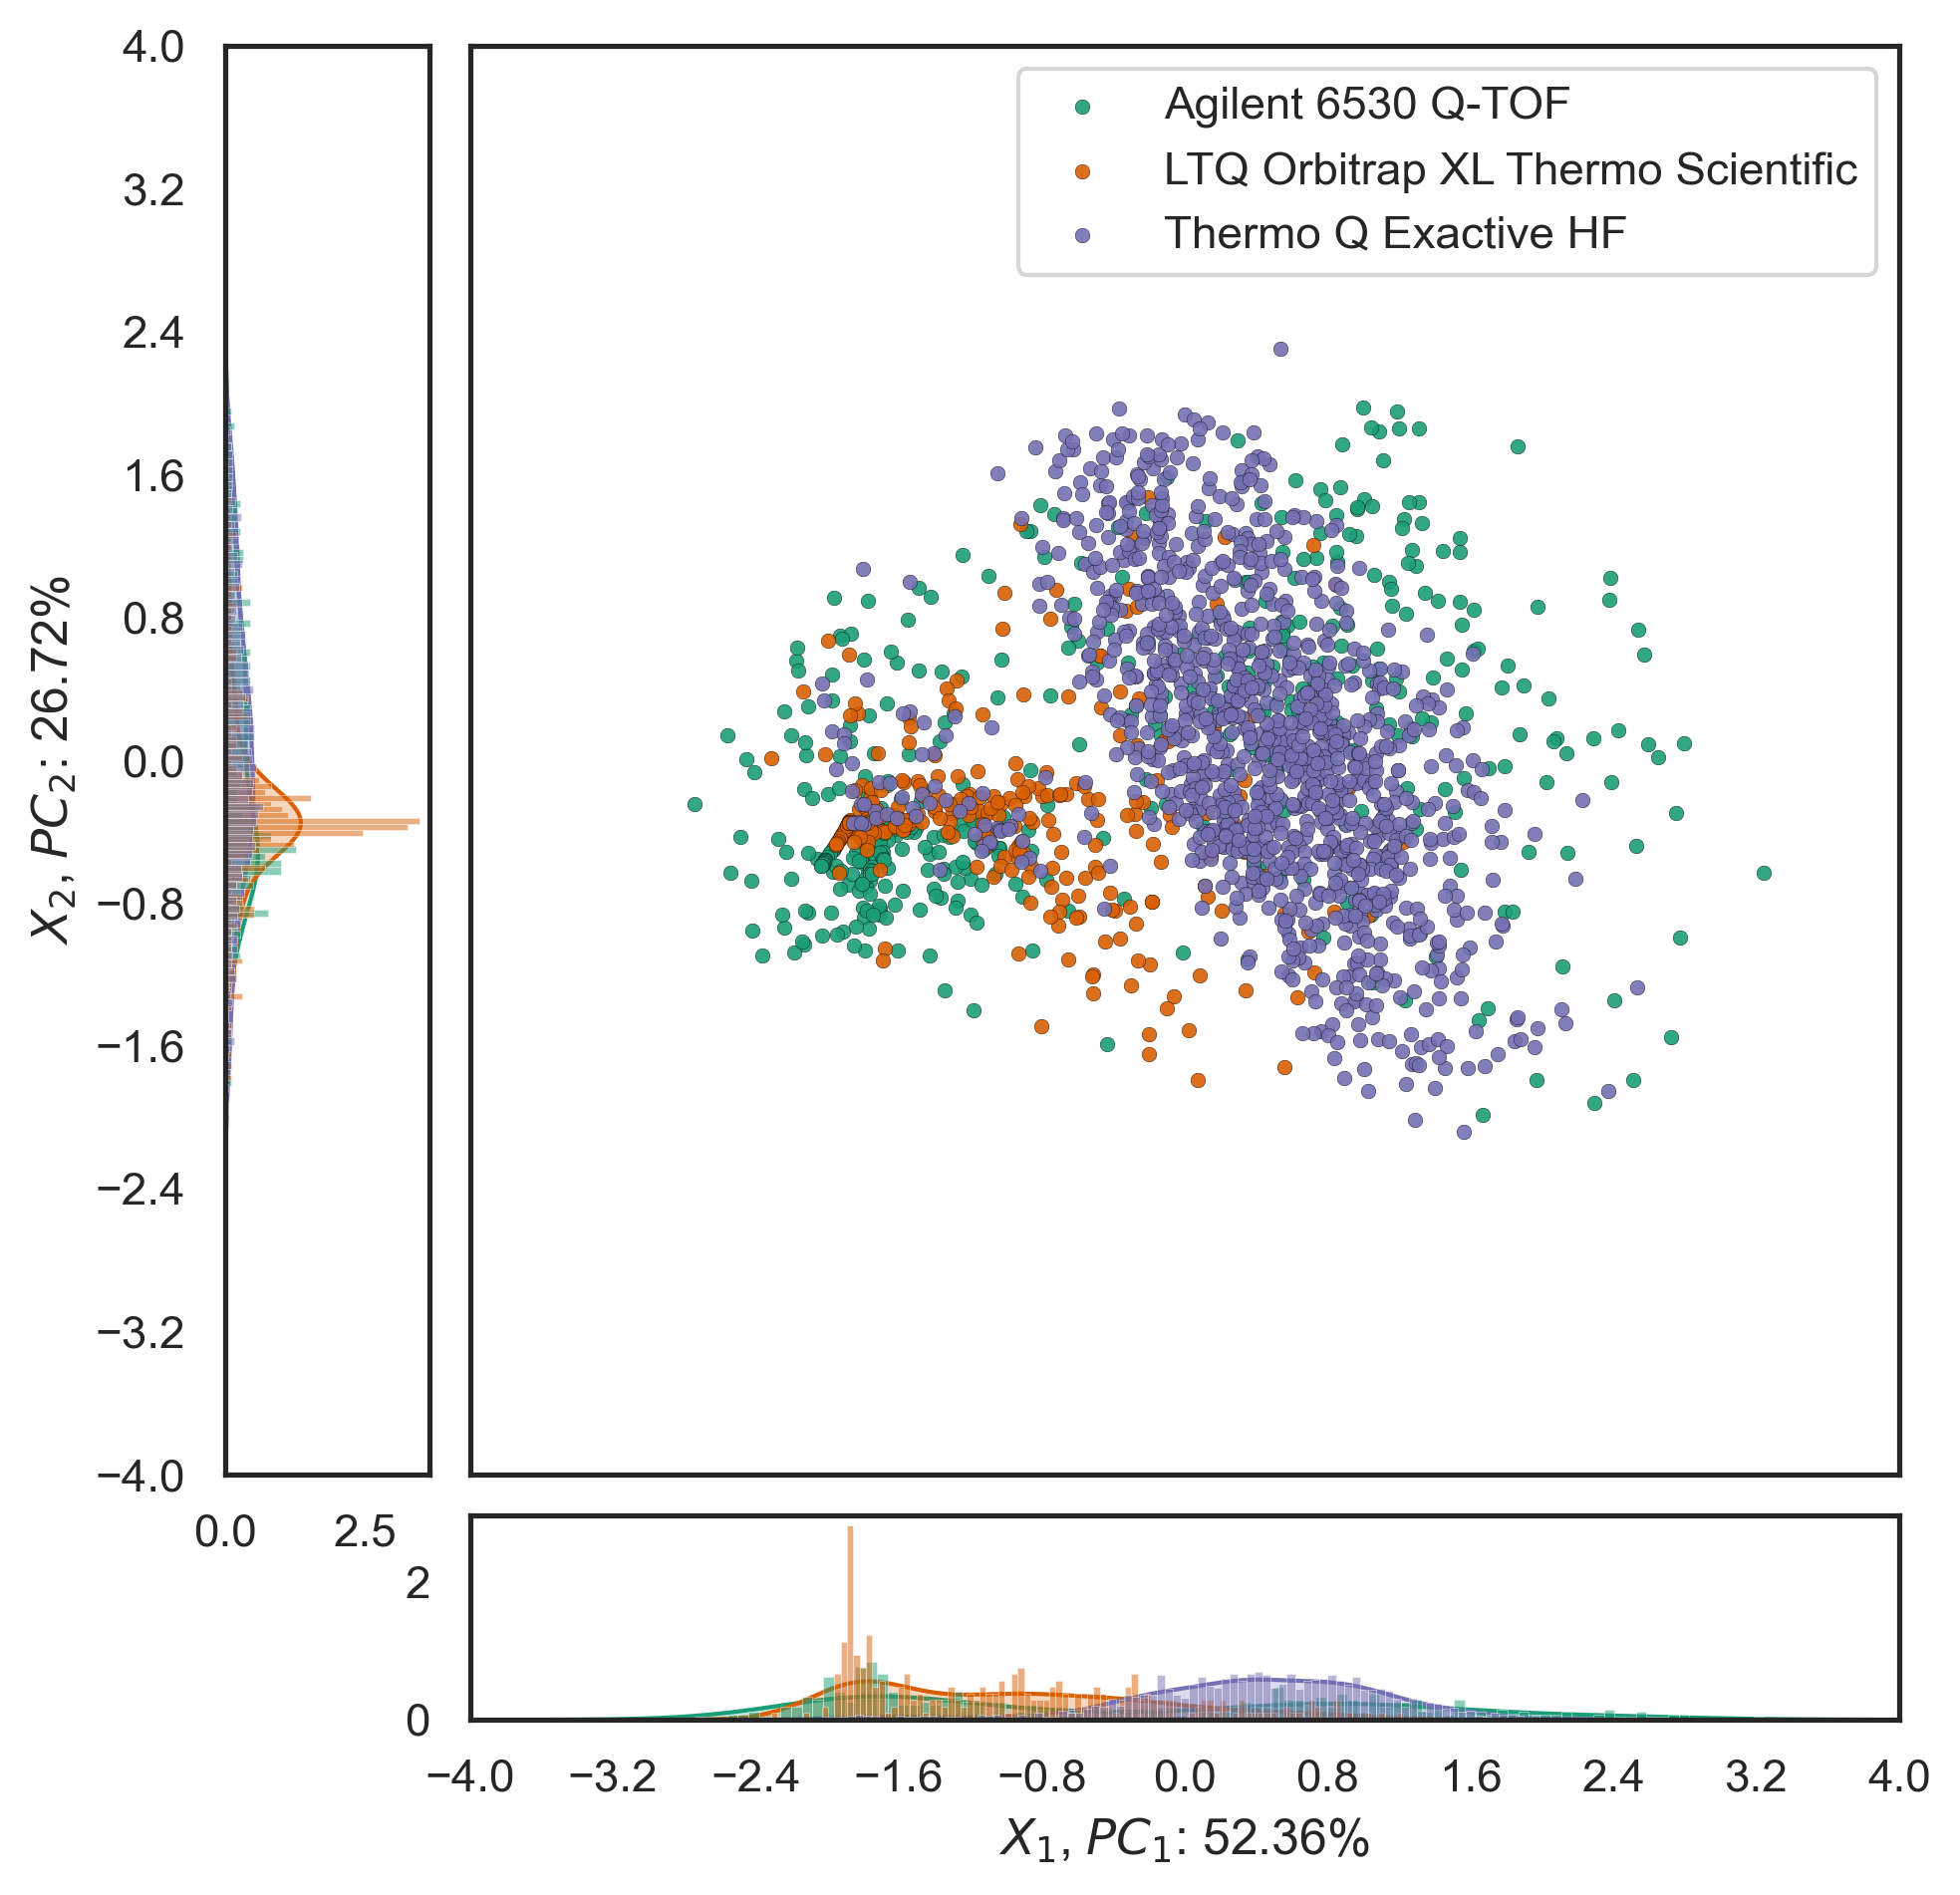

,ami,ari,sht
0,0.196153,0.202212,0.401375
1,0.196153,0.202212,0.401375
2,0.196188,0.202345,0.401414
3,0.196153,0.202212,0.401375
4,0.196153,0.202212,0.401375
5,0.196153,0.202212,0.401375
6,0.196188,0.202345,0.401414
7,0.196188,0.202345,0.401414
8,0.196223,0.202480,0.401433
9,0.196153,0.202212,0.401375


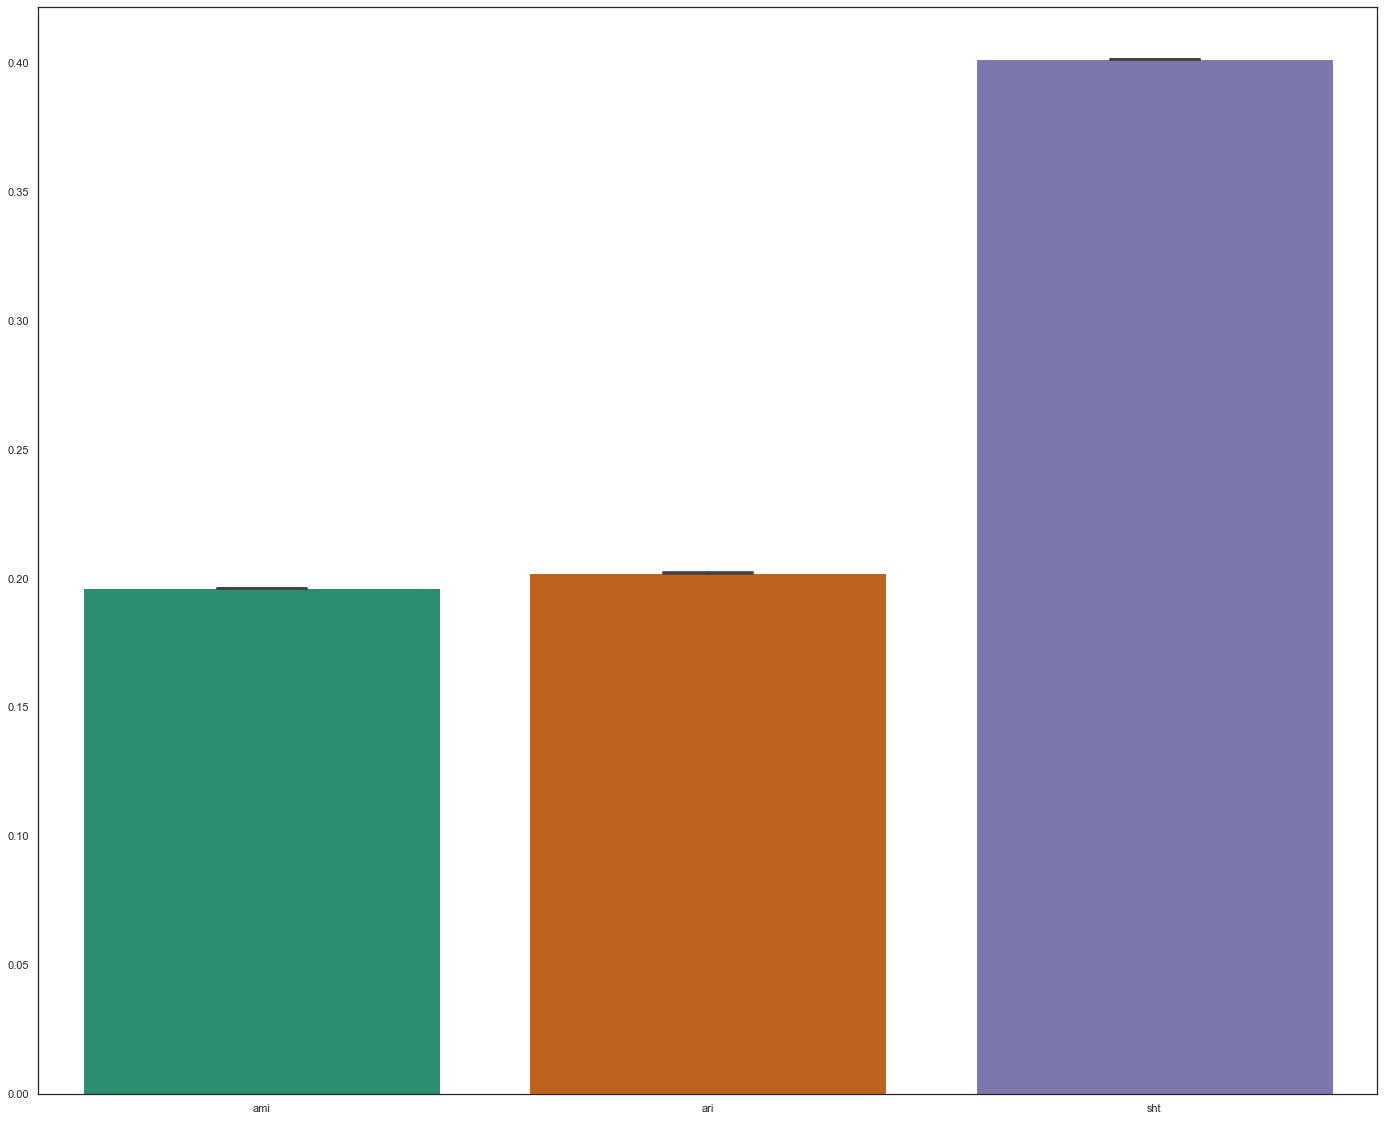

In [22]:
# from specvae.metrics import eu_dist, cos_sim, per_diff
from IPython.display import display

select_subset = True
xlim=(-14, 10)
ylim=(0., 0.5)
set_range = True
run_kmeans = True
run_kmeans_ntimes = 50
# Instrument Type:
# label = 'instrument_type_id'
# subset = [17, 23] # ['LC-ESI-QQ', 'LC-ESI-QQQ']
# subset = [16, 1, 18] # ['LC-ESI-TOF', 'LC-ESI-QTOF', 'LC-Q-TOF/MS']
# subset = [0, 2, 7] # ['ESI-QFT', 'LC-ESI-QFT', 'LC-ESI-ITFT']
# subset = [1, 0, 10, 23] # ['LC-ESI-QTOF', 'ESI-QFT', 'LC-ESI-ITFT']
# cmap = 'Reds'
# cmap = 'viridis'
# it_subset = [1, 0, 7, 2, 10, 17]

# Instrument:
label = 'instrument_id'
# it_subset = [0, 129, 130, 155, 161, 133, 122, 157, 136, 116, 115, 135]
subset = [0, 129, 130]

# Superclass
# label = 'superclass_id'
# it_subset = [6, 18, 14, 1, 10, 12, 0, 7, 5]
# subset = [6, 14]

# Ionization mode
# label = 'ionization_mode_id'
# it_subset = [0, 1]
# subset = [0, 1]

cmap = 'Dark2'
pca = True
dim1, dim2 = 1, 2 # applies only when pca is False

for path in model_dirs:
    model = load_model(path)
    df = load_vis_data('total_exact_mass')
    df_before = df.copy()
    if select_subset:
        df = df[df[label].isin(subset)]
    data = preload_data_as_tensor(model, df)
    data_np = evaluate_model(model, df, data)

    if data_np['model_type'] == 'betavae':
        colors = get_colors(df, data_np)
        n_dim = data_np['z'].shape[1]
        std_ = np.std(data_np['z'], axis=0)

        beta = model.config['beta']
        print('Path:', path)
        print('Beta:', beta)
        xlabel, ylabel = 'X', 'Y'
        if pca and n_dim > 2:
            pca2_data, r = compute_pca(data_np['z'], n=2)
            # pca2_data = compute_umap(data_np['z'], n=2)
            x, y = pca2_data[:,0], pca2_data[:,1]
            evr = r.explained_variance_ratio_
            xlabel, ylabel = '$X_{1}$, $PC_{1}$: %.2f%%' % (evr[0] * 100.), '$X_{2}$, $PC_{2}$: %.2f%%' % (evr[1] * 100.)
        elif pca == False and n_dim > 2:
            x, y = data_np['z'][:,dim1], data_np['z'][:,dim2]
            xlabel, ylabel = '$X_{%d}$, $std_{%d}$: %.3f' % (dim1+1, dim1+1, std_[dim1]), '$X_{%d}$, $std_{%d}$: %.3f' % (dim2+1, dim2+1, std_[dim2])
        elif n_dim == 2:
            x, y = data_np['z'][:,0], data_np['z'][:,1]
            xlabel, ylabel = '$X_{1}$, $std_{1}$: %.3f' % (std_[0]), '$X_{2}$, $std_{2}$: %.3f' % (std_[1])

        # fig = plot_latent(x, y, df[label].to_numpy(), scale_size=50.0, cmap=cmap, 
        #     alpha=0.5, figsize=(7,7), dpi=100, xlabel=xlabel, ylabel=ylabel, xlim=(-4, 4), ylim=(-4, 4))
        if label == 'ionization_mode_id' and dataset == 'MoNA':
            df = df[df[label.replace('_id', '')].isin(['positive', 'negative'])]
        color = df[label.replace('_id', '')].to_numpy()
        if set_range:
            fig, ax = plot_latent_discrete(x, y, color, scale_size=50.0, cmap=cmap, 
                alpha=0.9, figsize=(7,7), dpi=300, xlabel=xlabel, ylabel=ylabel, xlim=(-4, 4), ylim=(-4, 4))
        else:
            fig, ax = plot_latent_discrete(x, y, color, scale_size=50.0, cmap=cmap, 
                alpha=0.9, figsize=(7,7), dpi=300, xlabel=xlabel, ylabel=ylabel)

        z = np.zeros((x.shape[0], 2))
        z[:,0], z[:,1] = x, y

        plt.savefig(f'../.img/latent/{dataset}-betavae-cat-set{int(set_range)}-beta{beta}-{label}.png')
        plt.savefig(f'../.img/latent/{dataset}-betavae-cat-set{int(set_range)}-beta{beta}-{label}.svg')
        plt.show()

        if run_kmeans:
            import random
            cmetrics = {'ami': [], 'ari': [], 'sht': []}
            for i in range(run_kmeans_ntimes):
                np.random.seed((i + 1) * 4096)
                random.seed((i + 1) * 4096)
                km = KMeans(n_clusters=len(subset), random_state=((i + 1) * 4096)).fit(z)
                cmetrics['ami'].append(ami(color, km.labels_))
                cmetrics['ari'].append(ari(color, km.labels_))
                cmetrics['sht'].append(sht(eu_dist(z), km.labels_))
            mdf = pd.DataFrame(data=cmetrics)
            display(mdf)
            sns.barplot(data=mdf, ci='sd', capsize=.2, palette=cmap)
            plt.savefig(f'../.img/latent/{dataset}-betavae-cat-set{int(set_range)}-beta{beta}-{label}-kmeans.png')
            plt.savefig(f'../.img/latent/{dataset}-betavae-cat-set{int(set_range)}-beta{beta}-{label}-kmeans.svg')
            plt.show()
    
    elif data_np['model_type'] == 'jointvae':
        # df = df_all
        its = it_subset
        if select_subset:
            df = df[df[label].isin(subset)]
            its = subset + it_subset
        df = df[df['instrument_type_id'].isin(its)]
        inx = df['instrument_type_id'].unique().tolist()
        print('Map indicies from', inx, 'to', list(range(len(inx))))
        df['instrument_type_id_map'] = df.apply(lambda row: inx.index(row['instrument_type_id']), axis=1)

        data_all = preload_data_as_tensor(model, df)
        data_np = evaluate_model(model, df, data_all)
        Z = data_np['z']
        latent_spec = model.config['latent_spec']
        cont_dim = latent_spec['cont']
        disc_dims = latent_spec['disc']
        cont_Z = Z[:,:cont_dim]
        disc_Zs = [Z[:,cont_dim + dim1:cont_dim + dim1 + dim2] for dim1, dim2 in zip([0] + disc_dims, disc_dims)]
        assert(np.array_equal(Z, np.hstack((cont_Z, *disc_Zs))))
        print(cont_Z.shape)
        for disc_Z in disc_Zs:
            y = np.argmax(disc_Z, axis=1)
            print(disc_Z.shape, np.unique(y))
        
        print('KDE per combination of labels obtained from JointVAE')
        color = df[label.replace('_id', '')].to_numpy()
        fig = dicrete_plot(cont_Z, disc_Zs, color, kind='strip', scale=1., unitv=0.75, sunith=0.4, 
            legend_offset=2.5, enable_minor_grid=False, xlim=xlim, ylim=(-0.4,0.6), set_ylim=True)
        plt.show()

        y_trues = [np.eye(2)[data_np['ionization_mode_id']], 
            np.eye(6)[df['instrument_type_id_map'].to_numpy()]]
        for yt in y_trues:
            y = np.argmax(yt, axis=1)
            print(yt.shape, np.unique(y))

        print('KDE per combination of ground truth labels')
        # fig1 = dicrete_plot(cont_Z, y_trues, color, kind='kde', scale=1., unitv=0.75, sunith=0.4, 
        #     legend_offset=2.5, enable_minor_grid=False, xlim=xlim, ylim=ylim, set_ylim=True)
        true_labels = np.unique(color).tolist()
        if select_subset:
            # true_labels = [df_before['instrument_type'][df_before['instrument_type_id'] == idit].unique()[0] for idit in subset]
            true_labels += [df_before['instrument_type'][df_before['instrument_type_id'] == idit].unique()[0] for idit in it_subset if idit not in subset]
        true_labels = np.array(true_labels)
        print(true_labels.tolist())
        fig1 = dicrete_plot(cont_Z, y_trues, color,  kind='strip', true_labels={
                'ionization_mode': ['negative', 'positive'], 
                'instrument_type': true_labels
            }, scale=1., unitv=0.75, sunith=0.4, 
            legend_offset=2.5, enable_minor_grid=False, xlim=xlim, ylim=(-0.4,0.6), set_ylim=True)
        plt.show()
        z = cont_Z

        from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
        import sklearn.metrics as skm
        for disc_Z_ohe, yt_ohe in zip(disc_Zs, y_trues):
            disc_Z, yt = np.argmax(disc_Z_ohe, axis=1), np.argmax(yt_ohe, axis=1)
            
            nq_data, nq_pred = np.unique(yt), np.unique(disc_Z)
            metrics = compute_simple_metrics(
                yt, disc_Z, nq_data, n=yt_ohe.shape[1])
            display(metrics)

            cm = confusion_matrix(yt, disc_Z)
            disp = ConfusionMatrixDisplay(confusion_matrix=cm)
            fig, ax = plt.subplots(figsize=(10, 10))
            disp.plot(ax=ax)
            plt.show()

    # cm = eu_dist(torch.from_numpy(z), torch.from_numpy(z), matrix=True).detach().numpy()
    # cuq = np.unique(color)
    # print(cuq)
    # cm_ = get_cmap(cmap)
    # lut = dict(zip(cuq, cm_(range(cuq.shape[0]))))
    # row_colors = list(map(lambda x: lut[x], color))
    # sns.clustermap(cm, row_colors=row_colors, col_colors=row_colors, cmap='coolwarm_r', row_cluster=True)
    # plt.show()
    # break
